<a href="https://colab.research.google.com/github/ishanshah10/Concepts-and-Technologies-of-AI/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")




**Loading Dataset**

In [25]:
df = pd.read_csv("/content/drive/MyDrive/Concept and Technologies of AI/lending_club_loan_dataset.csv")

df.head()



,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0


****

**Dataset Understanding and Target Selection**

In [26]:

df.info()
df.describe(include="all")

# Target variable distribution
df['bad_loan'].value_counts()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   grade                  20000 non-null  object 
 2   annual_inc             20000 non-null  float64
 3   short_emp              20000 non-null  int64  
 4   emp_length_num         20000 non-null  int64  
 5   home_ownership         18509 non-null  object 
 6   dti                    19846 non-null  float64
 7   purpose                20000 non-null  object 
 8   term                   20000 non-null  object 
 9   last_delinq_none       20000 non-null  int64  
 10  last_major_derog_none  574 non-null    float64
 11  revol_util             20000 non-null  float64
 12  total_rec_late_fee     20000 non-null  float64
 13  od_ratio               20000 non-null  float64
 14  bad_loan               20000 non-null  int64  
dtypes:

,count
bad_loan,
0,16000
1,4000


**Data Quality Assessment**

In [27]:
df.isnull().sum()


,0
id,0
grade,0
annual_inc,0
short_emp,0
emp_length_num,0
home_ownership,1491
dti,154
purpose,0
term,0
last_delinq_none,0


**Exploratory Data Analysis (EDA)**

**Target Distribution**


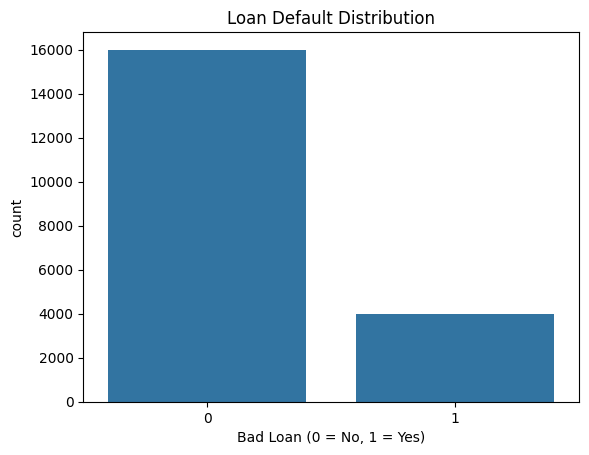

In [28]:
sns.countplot(x='bad_loan', data=df)
plt.title("Loan Default Distribution")
plt.xlabel("Bad Loan (0 = No, 1 = Yes)")
plt.show()


**Annual Income Distribution**

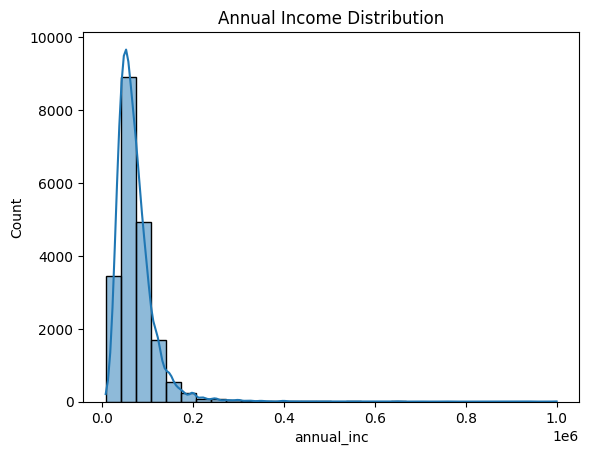

In [29]:
sns.histplot(df['annual_inc'], bins=30, kde=True)
plt.title("Annual Income Distribution")
plt.show()


**Debt-to-Income Ratio vs Loan Default**

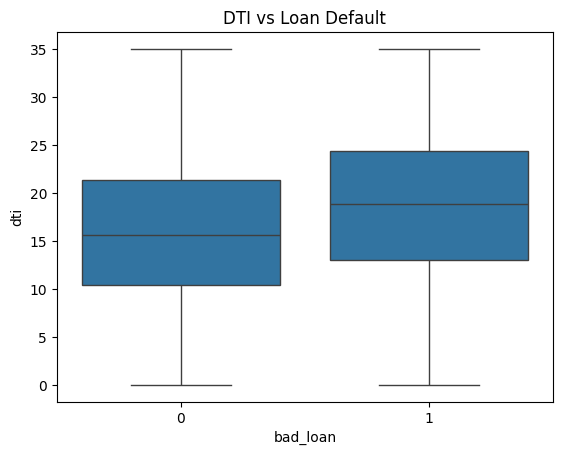

In [30]:
sns.boxplot(x='bad_loan', y='dti', data=df)
plt.title("DTI vs Loan Default")
plt.show()


**Correlation Heatmap**

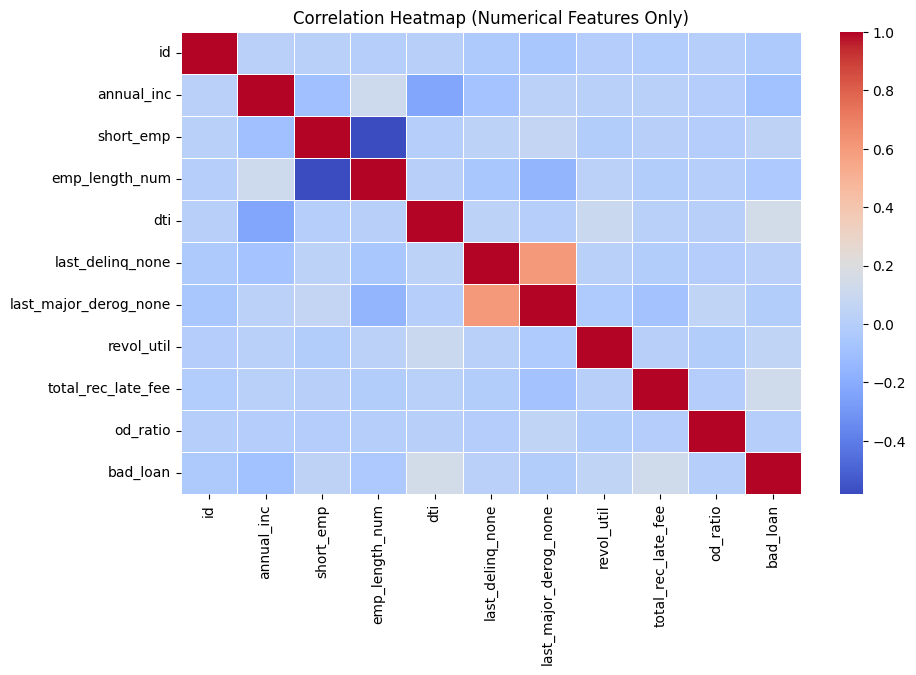

In [31]:
plt.figure(figsize=(10,6))

numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(
    numeric_df.corr(),
    cmap='coolwarm',
    linewidths=0.5
)

plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()


**Feature Target Split**

In [32]:
X = df.drop('bad_loan', axis=1)
y = df['bad_loan']


**Encode Categorical Features**

In [33]:
X = pd.get_dummies(X, drop_first=True)
X.head()


,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,11454641,100000.0,1,1,26.27,1,NaN,43.2,0.0,0.160624,...,False,False,False,False,False,False,False,False,True,False
1,9604874,83000.0,0,4,5.39,0,NaN,21.5,0.0,0.810777,...,False,False,False,False,False,False,False,False,True,False
2,9684700,78000.0,0,11,18.45,1,NaN,46.3,0.0,0.035147,...,False,False,False,False,False,False,False,False,False,True
3,9695736,37536.0,0,6,12.28,0,NaN,10.7,0.0,0.534887,...,False,False,True,False,False,False,False,False,False,True
4,9795013,65000.0,0,11,11.26,0,NaN,15.2,0.0,0.166500,...,False,False,False,False,False,False,False,False,True,False


**Train–Test Split & Feature Scaling**

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Neural Network Classifier (MLP)**

In [35]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

#IMPUTATION
imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

#SCALING
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

#NEURAL NETWORK
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

y_pred_mlp = mlp.predict(X_test_scaled)

print("Neural Network Performance")
print(classification_report(y_test, y_pred_mlp))




Neural Network Performance
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      3200
           1       0.33      0.23      0.27       800

    accuracy                           0.75      4000
   macro avg       0.58      0.56      0.56      4000
weighted avg       0.72      0.75      0.74      4000



**Classical Model 1: Logistic Regression**

In [36]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Sanity check (optional but recommended)
print("NaNs in train:", np.isnan(X_train_scaled).sum())
print("NaNs in test:", np.isnan(X_test_scaled).sum())



NaNs in train: 0
NaNs in test: 0


**Classical Model 2: Decision Tree**

In [37]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Performance")
print(classification_report(y_test, y_pred_dt))


Decision Tree Performance
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      3200
           1       0.27      0.28      0.28       800

    accuracy                           0.71      4000
   macro avg       0.55      0.55      0.55      4000
weighted avg       0.71      0.71      0.71      4000



**Hyperparameter Tuning (Cross-Validation)**

**Decision Tree GridSearch**

In [38]:
param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1'
)

grid_dt.fit(X_train, y_train)
grid_dt.best_params_


{'max_depth': 20, 'min_samples_split': 2}

**Feature Selection (Embedded Method: Logistic Regression)**

In [39]:
# ----- Refit Logistic Regression (IMPORTANT) -----
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

# ----- Extract feature importance -----
feature_importance = np.abs(lr.coef_[0])

# ----- Select important features -----
selected_features = X.columns[feature_importance > np.mean(feature_importance)]

selected_features



Index(['annual_inc', 'dti', 'total_rec_late_fee', 'grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G'],
      dtype='object')

**Final Models Using Selected Features**

In [40]:
# Make sure Logistic Regression is fitted
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Embedded feature selection
feature_importance = np.abs(lr.coef_[0])
selected_features = X.columns[feature_importance > np.mean(feature_importance)]

selected_features


Index(['annual_inc', 'dti', 'total_rec_late_fee', 'grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G'],
      dtype='object')

In [41]:
# Select important features
X_selected = X[selected_features]

# Train-test split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Impute + Scale (REQUIRED again)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imputer = SimpleImputer(strategy='mean')
X_train_s = imputer.fit_transform(X_train_s)
X_test_s = imputer.transform(X_test_s)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train_s)
X_test_s = scaler.transform(X_test_s)

# Train final models
final_lr = LogisticRegression(max_iter=1000)
final_dt = DecisionTreeClassifier(random_state=42)

final_lr.fit(X_train_s, y_train_s)
final_dt.fit(X_train_s, y_train_s)

pred_lr_final = final_lr.predict(X_test_s)
pred_dt_final = final_dt.predict(X_test_s)


In [45]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "Accuracy": [
        accuracy_score(y_test_s, pred_lr_final),
        accuracy_score(y_test_s, pred_dt_final)
    ],
    "Precision": [
        precision_score(y_test_s, pred_lr_final),
        precision_score(y_test_s, pred_dt_final)
    ],
    "Recall": [
        recall_score(y_test_s, pred_lr_final),
        recall_score(y_test_s, pred_dt_final)
    ],
    "F1-Score": [
        f1_score(y_test_s, pred_lr_final),
        f1_score(y_test_s, pred_dt_final)
    ]
})

results


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.8085,0.75000,0.06375,0.117512
1,Decision Tree,0.7025,0.26506,0.27500,0.269939
